### Natural Language Processing.

In [1]:
# install nltk library.
import nltk

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid') # copy from md file. 

In [3]:
# nltk.download_shell() # shell for nltk packages download.

# download "stopwords"

In [6]:
path = r'NLTK\smsspamcollection_1'

messages1 = [line.rstrip() for line in open(path)] # creating python list so we can use it's attribute.

In [4]:
len(messages1)

5574

In [5]:
for mess_no,message in enumerate(messages1[:10]): # enumerate provide pair with number from list.(!)
  print(mess_no,message,"\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
# Convert data into pandas data frame.

messages = pd.read_csv(path,sep='\t',names=['Lable','message'])

In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Lable    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
messages.head(10)

,Lable,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [34]:
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


<AxesSubplot:xlabel='Lable', ylabel='count'>

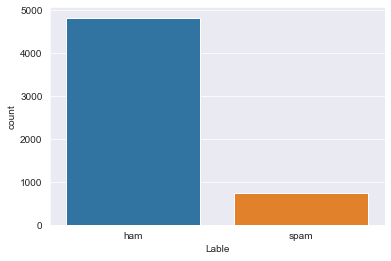

In [8]:
sns.countplot(x='Lable',data=messages)
# to much unbalanced data. 

In [38]:
messages.groupby('Lable').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
Lable                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

## Feature Engineering.

* adding new columns in the data based on the data already present. 

In [43]:
# large part of NLP is feature engineering, The better your domain knowledge it will help you from extrct more info. 

In [9]:
messages['length'] = messages['message'].apply(len)  

In [10]:
messages.head()

,Lable,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

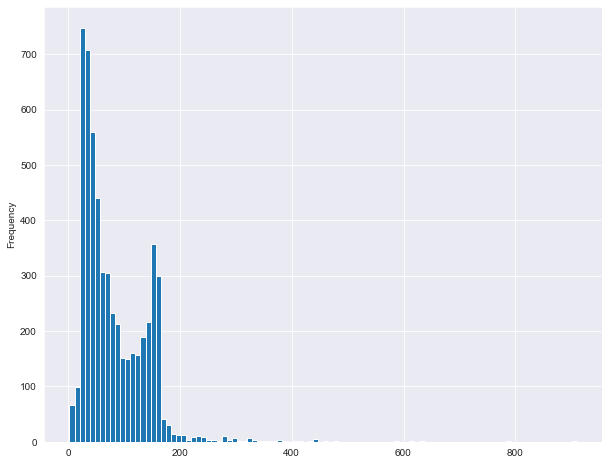

In [27]:
plt.figure(figsize=(10,8))
messages['length'].plot.hist(bins=100)

In [39]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length']>=700] 

,Lable,message,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

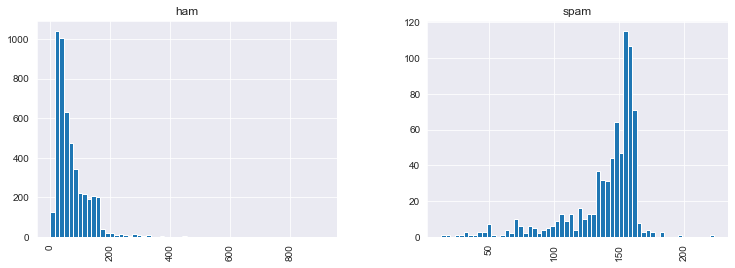

In [41]:
# make subplot based on column.(use->by) 
messages.hist(column='length',by='Lable',bins=60,figsize=(12,4)) # histogram.

In [11]:
# sample problem
import string

mess = 'Sample message! Notice: it has punctuation.'
string.punctuation # removing puncuation.

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
nopunc = [c for c in mess if c not in string.punctuation] # string comprehension.(Important.)
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [13]:
nopunc = ''.join(nopunc) # non punc to no punc 
nopunc                    

'Sample message Notice it has punctuation'

In [13]:
from nltk.corpus import stopwords
print(stopwords.words("english")) # words which do not add any value to the text data (We gonna remove this.)
len(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [14]:
# nopunc = nopunc.split() # get list of words.

clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [15]:
## All in one cell.

import string

mess = 'Sample message! Notice: it has punctuation.'

nopunc = [c for c in mess if c not in string.punctuation] # saprate 

nopunc = ''.join(nopunc)

# 'Vraj hello how are you'.split() // join opposite of split 

In [14]:
messages.head()


,Lable,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
# now make function for the same.

def text_process(mess):
  """
  1. remove punc(join afterwards.)
  2. remove stop words 
  3. return list of clean text words.
  """

  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc) # word as list. 
  return [word for word in nopunc.split() if word not in stopwords.words('english')] # remove stopwords.

In [16]:
messages['message'].apply(text_process)

# see how long it take for apply this function.

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
                              ...                        
5567    [This, 2nd, time, tried, 2, contact, u, U, £75...
5568             [Will, ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [The, guy, bitching, I, acted, like, id, inter...
5571                              [Rofl, Its, true, name]
Name: message, Length: 5572, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# take some time becase making huge size matrix.

In [26]:
len(bow_transformer.vocabulary_)

11617

In [ ]:
mess4 = messages['message'][3]
print(mess4)


U dun say so early hor... U c already then say...


In [28]:
bow4 = bow_transformer.transform([mess4])
print(bow4)

# Total number of unique words. (also show the counts.)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [29]:
print(bow4.shape)

(1, 11617)


In [32]:
bow_transformer.get_feature_names_out()[9746] 

'say'

In [33]:
messages_bow = bow_transformer.transform(messages['message'])

In [34]:
print('Shape of Sparse Matrix: ',messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11617)


In [35]:
messages_bow.nnz # Amount of non zero occurnace:

56024

In [36]:
sparsity = (100.0 * messages_bow.nnz /
            (messages_bow.shape[0] * messages_bow.shape[1]))
print(f'sparsity: {sparsity}')


sparsity: 0.08655038742205227


In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_TF =TfidfTransformer().fit(messages_bow)

In [38]:
tfidf_trasform = tfidf_TF.transform(bow4)
print(tfidf_trasform)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [39]:
tfidf_TF.idf_[bow_transformer.vocabulary_['university']]  

8.527076498901426

In [40]:
message_tfidf = tfidf_TF.transform(messages_bow)

In [41]:
# now We have messages as numerical vectors so we can train the model.
# We gonn'a use naive based classifire.

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
spam_detect_model = MultinomialNB().fit(message_tfidf, messages['Lable'])

In [43]:
spam_detect_model.predict(tfidf_trasform)

array(['ham'], dtype='<U4')

In [44]:
spam_detect_model.predict(tfidf_trasform)[0]

'ham'

In [45]:
# comapare
messages['Lable'][3]

'ham'

In [46]:
all_pred = spam_detect_model.predict(message_tfidf)

In [47]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [48]:
from sklearn.model_selection import train_test_split

msg_train,msg_test,label_train,lable_test = train_test_split(messages['message'],messages['Lable'],test_size=0.3)

In [49]:
# Data pipeline model from sklearn 

from sklearn.pipeline import Pipeline

In [50]:
pipeline = Pipeline(
  [
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
  ]
)

In [51]:
pipeline.fit(msg_train,label_train) ## fited pipe line object

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000234A94C7A60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [52]:
predictions = pipeline.predict(msg_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(lable_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1450
        spam       1.00      0.71      0.83       222

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.90      1672
weighted avg       0.96      0.96      0.96      1672

